K-means demo on two moons toy example.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn as skl
import sklearn.datasets

In [ ]:
# generate a mixture model using sklearn's data generation function

N = 512 # total number of samples 

# X is our inoput data. The Y's are only used for plotting and assessment of accuracy 
X, Y = skl.datasets.make_blobs(n_samples=N, centers=[[0, 0], [.8,.3], [-0.3, -0.15]], cluster_std= [.15, 0.1, 0.05], n_features=2,random_state=0)

Text(0.5, 1.0, 'Input (Unlabelled) data')

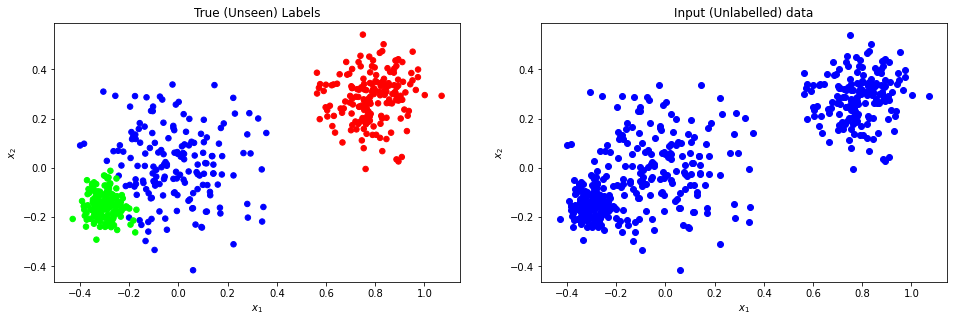

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(16,8))

ax[0].scatter(X[:,0], X[:,1], c=Y, s= 30, cmap='brg')
ax[0].set_aspect('equal')
ax[0].set_xlabel('$x_1$')
ax[0].set_ylabel('$x_2$')
ax[0].set_title('True (Unseen) Labels')

ax[1].scatter(X[:,0], X[:,1], color='b')
ax[1].set_aspect('equal')
ax[1].set_xlabel('$x_1$')
ax[1].set_ylabel('$x_2$')
ax[1].set_title('Input (Unlabelled) data')

In [ ]:
# apply K-mean clustering to dataset to discover clusters 

import sklearn.cluster 

K = 3

KMM = skl.cluster.KMeans(n_clusters=K, random_state=0)

KMM.fit(X)

Y_pred = np.array(KMM.labels_, dtype=float) # predicted clusters by K-means



Text(0.5, 1.0, 'Predicted Labels with K= 3')

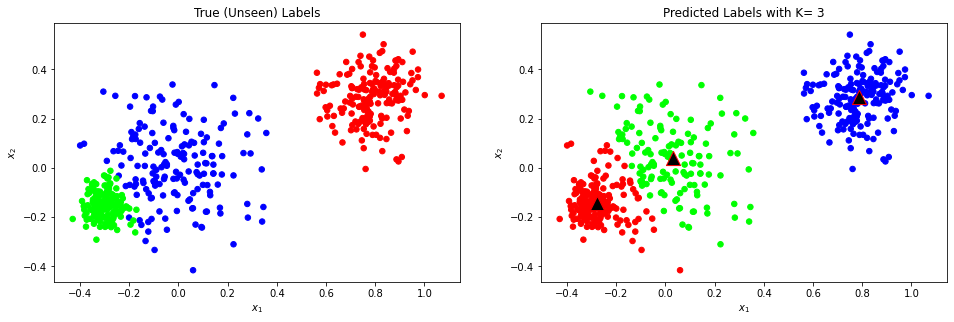

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(16,8))

ax[0].scatter(X[:,0], X[:,1], c=Y, s= 30, cmap='brg')
ax[0].set_aspect('equal')
ax[0].set_xlabel('$x_1$')
ax[0].set_ylabel('$x_2$')
ax[0].set_title('True (Unseen) Labels')

ax[1].scatter(X[:,0], X[:,1], c=Y_pred, s= 30, cmap='brg')
ax[1].scatter(KMM.cluster_centers_[:,0], KMM.cluster_centers_[:,1], color='k', edgecolors='r', marker='^',  s= 200 )
ax[1].set_aspect('equal')
ax[1].set_xlabel('$x_1$')
ax[1].set_ylabel('$x_2$')
ax[1].set_title('Predicted Labels with K= '+str(K))

In [ ]:
print(X.shape)

(512, 2)


In [ ]:
# Elbow plot


KK = np.arange(1,10)
WSS = []


for j in range(len(KK)):

  KMM = skl.cluster.KMeans(n_clusters=KK[j], random_state=0)

  KMM.fit(X)

  centroids = KMM.cluster_centers_

  Y_pred = KMM.labels_

  # compute WSS 

  wss = 0

  for i in range(N):
    current_cents = centroids[Y_pred[i]]
    wss += np.linalg.norm( X[i] - current_cents )**2

  WSS.append(wss)

Text(0, 0.5, 'WSS(K)')

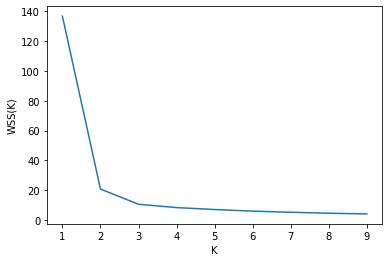

In [ ]:
plt.plot(KK, WSS)
plt.xlabel('K')
plt.ylabel('WSS(K)')

Text(0.5, 1.0, 'Input (Unlabelled) data')

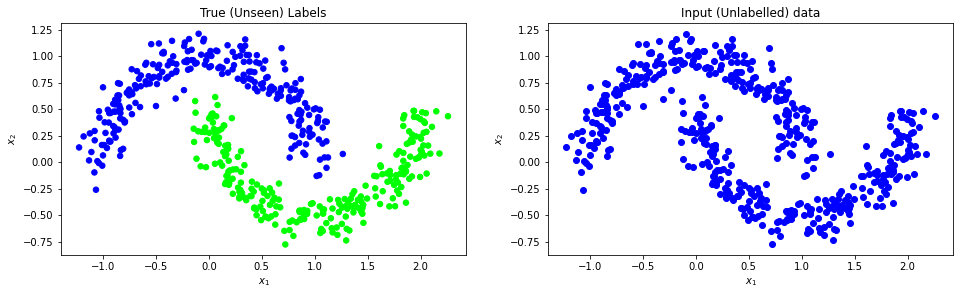

In [ ]:
# K means on two moons

X_moon, Y_moon = skl.datasets.make_moons(n_samples=N, noise= 0.1, random_state=0)

fig, ax = plt.subplots(1,2, figsize=(16,8))

ax[0].scatter(X_moon[:,0], X_moon[:,1], c=Y_moon, s= 30, cmap='brg')
ax[0].set_aspect('equal')
ax[0].set_xlabel('$x_1$')
ax[0].set_ylabel('$x_2$')
ax[0].set_title('True (Unseen) Labels')

ax[1].scatter(X_moon[:,0], X_moon[:,1], color='b')
ax[1].set_aspect('equal')
ax[1].set_xlabel('$x_1$')
ax[1].set_ylabel('$x_2$')
ax[1].set_title('Input (Unlabelled) data')


In [ ]:
K=2

KMM_moon = skl.cluster.KMeans(n_clusters=K, random_state=0)

KMM_moon.fit(X_moon)

Y_moon_pred = np.array(KMM_moon.labels_, dtype=float) # predicted clusters by K-means




Text(0.5, 1.0, 'Predicted Labels with K= 2')

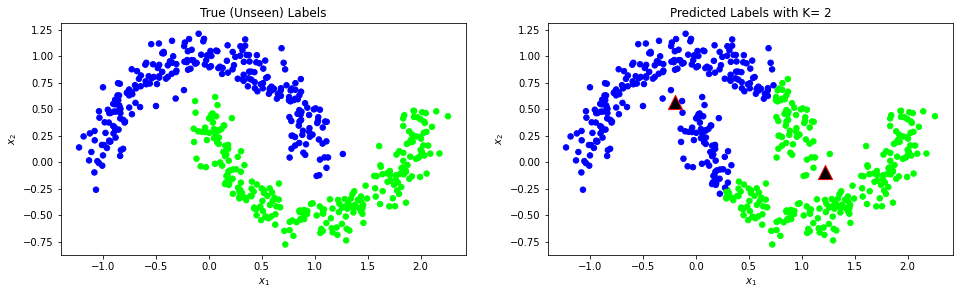

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(16,8))

ax[0].scatter(X_moon[:,0], X_moon[:,1], c=Y_moon, s= 30, cmap='brg')
ax[0].set_aspect('equal')
ax[0].set_xlabel('$x_1$')
ax[0].set_ylabel('$x_2$')
ax[0].set_title('True (Unseen) Labels')

ax[1].scatter(X_moon[:,0], X_moon[:,1], c=Y_moon_pred, s= 30, cmap='brg')
ax[1].scatter(KMM_moon.cluster_centers_[:,0], KMM_moon.cluster_centers_[:,1], color='k', edgecolors='r', marker='^',  s= 200 )
ax[1].set_aspect('equal')
ax[1].set_xlabel('$x_1$')
ax[1].set_ylabel('$x_2$')
ax[1].set_title('Predicted Labels with K= '+str(K))